### EDA2 Imager PART A: Calculation of UVW 

To begin with, I have hard-code the values of operating frequency.  
(Next version would be to automate this process)

**Telescope details:**
- EDA2 data: 20200209, 256 Tiles

**Duration of the project:**
- Start Date : 26/08/2022
- End Date   : 25/10/2022

**Other notes:**
- Auto-correlated visibilities, have not been included. 

### Importing libraries

In [1]:
# Importing fits library for viewing the images 
from astropy.io import fits

# For plotting
import matplotlib.pyplot as plt

# For plotting 3D plots
from mpl_toolkits.mplot3d import Axes3D

# Using Pandas
import pandas as pd

# In order to use numpy
import numpy as np

# For performing math calculations 
import math
from math import sin as sin
from math import cos as cos
from math import pi as pi 
from math import sqrt as sqrt 

# To check the system details 
import sys

# To check the version of astropy 
import astropy.version

import time

print('Versions Running on:')
print(f'\tPython\t\t{sys.version[:31]})')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')

Versions Running on:
	Python		3.7.3 (default, Apr 24 2019, 15)
	Astropy		3.2.1
	Matplotlib	3.1.0


In [2]:
# Defining start time
start = time.process_time()

Assuming the frequency: 159.3750 MHz

In [3]:
# Defining and calculating all the constants

# speed of light : 3 x 10^8 m/s
c = 299792458.0 
print('Speed of light(m/s):', c)

# operating frequency = 159.3750 MHz
frequency = 159.3750*(10**6)
print('Operating frequency in (Hz):', frequency)

# Calculating wavelength 
wavelength = c/frequency
print('Calculated wavelength in (m):', wavelength)

Speed of light(m/s): 299792458.0
Operating frequency in (MHz): 159375000.0
Calculated wavelength in (m): 1.881050716862745


## EDA2 Data

### Step 1 : Getting the input visibilities: as real and imaginary data!

**Inputs:**
- **chan_204_20200209T034646_vis_real.fits**
- **chan_204_20200209T034646_vis_imag.fits**

In [4]:
vis_real = fits.open("chan_204_20200209T034646_vis_real.fits")
vis_imag = fits.open("chan_204_20200209T034646_vis_imag.fits")

In [5]:
vis_real_image = vis_real[0].data 
vis_imag_image = vis_imag[0].data 

In [6]:
# Examining the header for the real value of visibilities
vis_real[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
EXTEND  =                    T                                                  

In [7]:
# Examining the header for the imaginary value of visibilities
vis_imag[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
EXTEND  =                    T                                                  

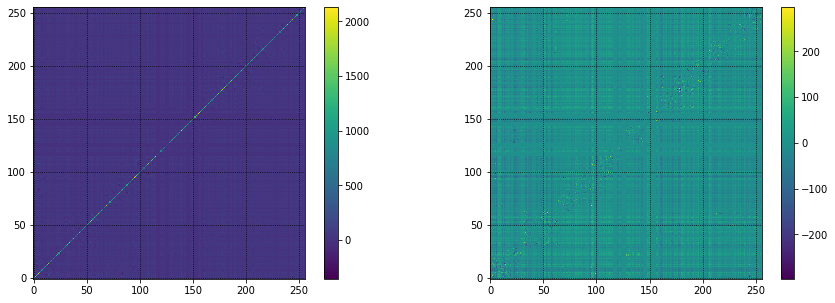

In [8]:
# create figure
# fig = plt.figure(figsize=(15, 15))
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(vis_real_image, origin="lower",aspect='equal')
plt.grid(color='black', ls='dotted')
plt.colorbar()

# Adds a subplot 
fig.add_subplot(rows, columns, 2)
plt.imshow(vis_imag_image,origin="lower",aspect='equal')
plt.grid(color='black', ls='dotted')
plt.colorbar()

In [9]:
# Creating a dataframe for all the real and imaginary visibilities 
df_vis_real = pd.DataFrame(vis_real_image)
df_vis_imag = pd.DataFrame(vis_imag_image)

In [10]:
df_vis_real

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,328.867615,24.588898,21.415720,25.159893,23.272156,32.623756,67.544327,25.600283,-5.008373,56.130409,...,20.584955,23.733694,25.835600,21.793711,22.231745,17.629080,12.726423,0.000000,32.011589,0.0
1,24.588898,1001.324097,32.625900,30.562368,42.107533,67.392723,49.459095,42.223946,30.334806,45.333996,...,21.941923,34.037449,69.689140,58.551960,49.599106,64.068863,42.769550,0.000000,63.610893,0.0
2,21.415720,32.625900,1802.112183,-221.844772,5.765813,75.233185,28.925854,83.027077,53.337502,41.076969,...,-11.819213,103.449448,56.257942,100.279205,58.589966,71.161095,-25.184362,0.000000,100.275230,0.0
3,25.159893,30.562368,-221.844772,1310.901611,119.502617,68.835815,46.054825,41.802647,53.148262,54.665218,...,96.976486,-2.359920,38.590828,38.563461,54.418682,48.846432,41.607552,0.000000,20.950336,0.0
4,23.272156,42.107533,5.765813,119.502617,1286.565674,65.288414,111.641373,72.028549,-37.939823,20.661905,...,54.904049,21.105185,40.463306,48.886780,55.891804,51.915932,58.621078,0.000000,31.471109,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17.629080,64.068863,71.161095,48.846432,51.915932,60.429646,46.813198,33.485138,13.373882,42.458595,...,-13.461903,52.166763,74.276253,133.680374,73.888390,879.381104,22.676611,0.000000,76.081261,0.0
252,12.726423,42.769550,-25.184362,41.607552,58.621078,44.896183,37.506577,30.086102,-22.894238,10.552099,...,29.180481,-74.083374,10.674245,52.206303,40.935318,22.676611,624.956604,0.000000,21.866514,0.0
253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,319.147003,0.000000,0.0
254,32.011589,63.610893,100.275230,20.950336,31.471109,71.682938,71.904350,36.675194,29.030394,56.140846,...,52.424744,151.915543,12.107138,78.551941,44.032146,76.081261,21.866514,0.000000,1190.157593,0.0


In [11]:
df_vis_imag

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000000,20.347363,5.232766,17.098120,13.575706,40.088928,-4.494764,36.376900,4.382819,-5.101678,...,8.985415,0.704096,5.380109,16.447519,11.223100,13.179231,5.354980,0.0,17.303267,0.0
1,-20.347363,0.000000,-49.239357,23.557892,-10.475840,-7.355006,-58.698902,19.284822,27.034655,8.961044,...,-23.801003,-31.874340,-15.966197,-20.245653,1.901799,-21.248463,-23.853127,0.0,-34.438774,0.0
2,-5.232766,49.239357,0.000000,-158.680908,-65.660355,7.385582,-44.348717,24.389639,97.863960,54.119991,...,-25.575441,73.233078,62.957054,7.752845,-16.787003,-19.817877,-15.419326,0.0,60.391262,0.0
3,-17.098120,-23.557892,158.680908,0.000000,-37.410690,-3.263887,-64.458542,-7.080525,10.403498,25.782703,...,-18.212944,-3.222548,-53.895336,16.432007,-0.216329,29.501335,-70.752960,0.0,-9.924271,0.0
4,-13.575706,10.475840,65.660355,37.410690,0.000000,42.297253,-14.743159,37.618340,86.671875,59.724304,...,5.650125,19.793768,14.020086,37.388325,25.409815,35.181412,-10.839559,0.0,24.132935,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-13.179231,21.248463,19.817877,-29.501335,-35.181412,7.335309,-46.296852,14.544776,27.321148,30.595789,...,-90.726624,-7.259159,44.580070,78.706909,49.937153,0.000000,-12.332708,0.0,2.397506,0.0
252,-5.354980,23.853127,15.419326,70.752960,10.839559,27.200115,-15.889991,43.369865,53.596153,17.110559,...,13.591352,-54.479179,8.241980,12.858488,12.370975,12.332708,0.000000,0.0,-52.071907,0.0
253,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000,0.0
254,-17.303267,34.438774,-60.391262,9.924271,-24.132935,15.218106,-56.081131,13.845360,25.737886,26.019999,...,-51.124516,-92.209778,-39.171150,23.684786,21.613491,-2.397506,52.071907,-0.0,0.000000,0.0


Notes: 
- We have visibilities corresponding to every antenna pair i.e every baseline
- Hence, number of visibilities = Na(Na-1)/2
- Here, for EDA2 configuration, Na = 256

### Step 2 : Calculating u, v and w values from antenna positions.

**Inputs:**
**antenna_locations.txt**

In [12]:
with open('antenna_locations.txt') as f:
    lines = f.readlines()

In [13]:
for item in lines:
    print(item)

# EDA2 antenna locations.

# lines beginning with '#' and blank lines are ignored. Do not leave spaces in empty lines.

# locations of antennas relative to the centre of the array in local topocentric

# "east". "north". "height". Units are meters.

# Format: Antenna_name east north height

# antenna names must be 8 chars or less

# fields are separated by white space

Ant061	6.437	4.975	-0.026

Ant063	-0.29	-0.256	0.016

Ant064	6.804	1.32	-0.001

Ant083	5.331	1.075	-0.013

Ant136	-0.363	3.256	-0.010

Ant124	1.86	9.002	-0.037

Ant123	0.923	6.104	-0.031

Ant122	1.772	4.249	-0.012

Ant084	4.3	3.282	-0.029

Ant085	4.264	5.952	-0.048

Ant086	5.668	6.391	-0.029

Ant097	2.832	6.377	-0.036

Ant121	1.122	2.964	-0.006

Ant120	0.465	1.694	-0.010

Ant099	2.546	1.643	-0.001

Ant098	3.669	4.665	-0.034

Ant134	-0.521	8.213	-0.031

Ant135	-1.115	6.463	-0.028

Ant152	-2.806	0.997	0.015

Ant153	-2.829	3.659	-0.006

Ant201	-8.592	3.065	0.026

Ant200	-9.235	4.437	0.006

Ant199	-8.371	6.292	0.002

Ant188	

We clearly need to do lots of data-cleaning to be able to read the antenna_positions.txt in a suitable format!

In [14]:
lines.pop(0)

'# EDA2 antenna locations.\n'

In [15]:
lines.pop(0)

"# lines beginning with '#' and blank lines are ignored. Do not leave spaces in empty lines.\n"

In [16]:
lines.pop(0)

'# locations of antennas relative to the centre of the array in local topocentric\n'

In [17]:
lines.pop(0)

'# "east". "north". "height". Units are meters.\n'

In [18]:
lines.pop(0)

'# Format: Antenna_name east north height\n'

In [19]:
lines.pop(0)

'# antenna names must be 8 chars or less\n'

In [20]:
lines.pop(0)

'# fields are separated by white space\n'

In [21]:
lines

['Ant061\t6.437\t4.975\t-0.026\n',
 'Ant063\t-0.29\t-0.256\t0.016\n',
 'Ant064\t6.804\t1.32\t-0.001\n',
 'Ant083\t5.331\t1.075\t-0.013\n',
 'Ant136\t-0.363\t3.256\t-0.010\n',
 'Ant124\t1.86\t9.002\t-0.037\n',
 'Ant123\t0.923\t6.104\t-0.031\n',
 'Ant122\t1.772\t4.249\t-0.012\n',
 'Ant084\t4.3\t3.282\t-0.029\n',
 'Ant085\t4.264\t5.952\t-0.048\n',
 'Ant086\t5.668\t6.391\t-0.029\n',
 'Ant097\t2.832\t6.377\t-0.036\n',
 'Ant121\t1.122\t2.964\t-0.006\n',
 'Ant120\t0.465\t1.694\t-0.010\n',
 'Ant099\t2.546\t1.643\t-0.001\n',
 'Ant098\t3.669\t4.665\t-0.034\n',
 'Ant134\t-0.521\t8.213\t-0.031\n',
 'Ant135\t-1.115\t6.463\t-0.028\n',
 'Ant152\t-2.806\t0.997\t0.015\n',
 'Ant153\t-2.829\t3.659\t-0.006\n',
 'Ant201\t-8.592\t3.065\t0.026\n',
 'Ant200\t-9.235\t4.437\t0.006\n',
 'Ant199\t-8.371\t6.292\t0.002\n',
 'Ant188\t-6.389\t6.799\t-0.010\n',
 'Ant154\t-4.006\t5.484\t-0.030\n',
 'Ant155\t-2.164\t5.559\t-0.022\n',
 'Ant156\t-2.633\t8.285\t-0.033\n',
 'Ant167\t-5.292\t8.106\t-0.002\n',
 'Ant187\t-7.06

In [22]:
antenna_num_list = list()
x_positions_list = list()
y_positions_list = list()
z_positions_list = list()

In [23]:
antenna_positions = pd.DataFrame(columns=['Antenna_Name', 'X', 'Y', 'Z'])

In [24]:
# Ref : https://stackoverflow.com/questions/66698339/iterate-a-list-of-rows-and-split
result_list = []
for i in lines: 
    k = i.split()
    result_list.append(k)
print(result_list[:5])

[['Ant061', '6.437', '4.975', '-0.026'], ['Ant063', '-0.29', '-0.256', '0.016'], ['Ant064', '6.804', '1.32', '-0.001'], ['Ant083', '5.331', '1.075', '-0.013'], ['Ant136', '-0.363', '3.256', '-0.010']]


In [25]:
# Ref : https://stackoverflow.com/questions/13188476/get-the-nth-element-from-the-inner-list-of-a-list-of-lists-in-python
antenna_name_list = [el[0] for el in result_list]
x_positions_list = [el[1] for el in result_list]
y_positions_list = [el[2] for el in result_list]
z_positions_list = [el[3] for el in result_list]

In [26]:
# Assigning the relevant lists as columns
antenna_positions['Antenna_Name'] = antenna_name_list
antenna_positions['X'] = x_positions_list
antenna_positions['Y'] = y_positions_list
antenna_positions['Z'] = z_positions_list

In [27]:
antenna_positions.head()

,Antenna_Name,X,Y,Z
0,Ant061,6.437,4.975,-0.026
1,Ant063,-0.29,-0.256,0.016
2,Ant064,6.804,1.32,-0.001
3,Ant083,5.331,1.075,-0.013
4,Ant136,-0.363,3.256,-0.010


### Understanding the data-frame:

**Antenna_Number** : Total number of antennas: 256

**X** : Towards East in meters.

**Y** : Towards North 

**Z** : How high up the tile is from ground?

In [28]:
antenna_positions.describe()

,Antenna_Name,X,Y,Z
count,256,256,256,256
unique,256,256,255,142
top,Ant050,-2.284,13.196,0.065
freq,1,1,2,5


In [29]:
antenna_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Antenna_Name  256 non-null    object
 1   X             256 non-null    object
 2   Y             256 non-null    object
 3   Z             256 non-null    object
dtypes: object(4)
memory usage: 8.1+ KB


In [30]:
antenna_positions['X'] = pd.to_numeric(antenna_positions['X'])
antenna_positions['Y'] = pd.to_numeric(antenna_positions['Y'])
antenna_positions['Z'] = pd.to_numeric(antenna_positions['Z'])

In [31]:
# Calculating X_lambda and creating a new column 
antenna_positions['X_wavelength'] = antenna_positions['X']/wavelength

# Calculating Y_lambda and creating a new column 
antenna_positions['Y_wavelength'] = antenna_positions['Y']/wavelength

# Assigning the Z_lambda value to be 0, as we are ignoring the height of the antenna?
antenna_positions['Z_wavelength'] = antenna_positions['Z']/wavelength

antenna_positions.head()

,Antenna_Name,X,Y,Z,X_wavelength,Y_wavelength,Z_wavelength
0,Ant061,6.437,4.975,-0.026,3.422024,2.644798,-0.013822
1,Ant063,-0.290,-0.256,0.016,-0.154169,-0.136094,0.008506
2,Ant064,6.804,1.320,-0.001,3.617127,0.701735,-0.000532
3,Ant083,5.331,1.075,-0.013,2.834054,0.571489,-0.006911
4,Ant136,-0.363,3.256,-0.010,-0.192977,1.730947,-0.005316


In [32]:
antenna_positions.shape

(256, 7)

In [33]:
## Need to convert these Antenna_Number into a single digit from Ant061 to 61

In [34]:
a=np.array(antenna_positions['Antenna_Name'])

In [35]:
a[0][3:]

'061'

In [36]:
a1_list = list()
for i in range(len(antenna_positions['Antenna_Name'])):
    a1_list.append(int(a[i][3:]))

In [37]:
# antenna number only list 
a1_list

[61,
 63,
 64,
 83,
 136,
 124,
 123,
 122,
 84,
 85,
 86,
 97,
 121,
 120,
 99,
 98,
 134,
 135,
 152,
 153,
 201,
 200,
 199,
 188,
 154,
 155,
 156,
 167,
 187,
 186,
 169,
 168,
 118,
 137,
 138,
 147,
 204,
 203,
 185,
 184,
 148,
 149,
 150,
 151,
 183,
 172,
 171,
 170,
 65,
 66,
 79,
 80,
 139,
 119,
 117,
 116,
 81,
 82,
 100,
 101,
 105,
 104,
 103,
 102,
 6,
 7,
 8,
 21,
 62,
 53,
 52,
 51,
 23,
 24,
 25,
 26,
 32,
 31,
 30,
 29,
 27,
 28,
 54,
 55,
 96,
 95,
 91,
 90,
 56,
 57,
 58,
 59,
 89,
 88,
 87,
 60,
 92,
 93,
 94,
 125,
 162,
 161,
 160,
 159,
 126,
 127,
 128,
 129,
 133,
 132,
 131,
 130,
 157,
 158,
 163,
 164,
 223,
 197,
 196,
 195,
 165,
 166,
 189,
 190,
 194,
 193,
 192,
 191,
 198,
 220,
 221,
 222,
 252,
 251,
 250,
 249,
 224,
 225,
 226,
 227,
 248,
 247,
 246,
 228,
 202,
 217,
 218,
 219,
 255,
 254,
 253,
 245,
 229,
 230,
 231,
 240,
 244,
 243,
 242,
 241,
 205,
 206,
 212,
 213,
 256,
 239,
 238,
 237,
 214,
 215,
 216,
 232,
 236,
 235,
 234,
 233

In [38]:
# Assigning the relevant lists as columns
# antenna_positions['Antenna_Number'] = a1_list

In [39]:
# antenna_positions.head()

In [40]:
a1_list.sort()

In [41]:
a1_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [42]:
a1_list.append(0)

In [43]:
a1_list.sort()

In [44]:
a1_list.pop()

256

In [45]:
a1_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [46]:
# Assigning the relevant lists as columns
antenna_positions['Antenna_Number'] = a1_list

In [47]:
antenna_positions

,Antenna_Name,X,Y,Z,X_wavelength,Y_wavelength,Z_wavelength,Antenna_Number
0,Ant061,6.437,4.975,-0.026,3.422024,2.644798,-0.013822,0
1,Ant063,-0.290,-0.256,0.016,-0.154169,-0.136094,0.008506,1
2,Ant064,6.804,1.320,-0.001,3.617127,0.701735,-0.000532,2
3,Ant083,5.331,1.075,-0.013,2.834054,0.571489,-0.006911,3
4,Ant136,-0.363,3.256,-0.010,-0.192977,1.730947,-0.005316,4
...,...,...,...,...,...,...,...,...
251,Ant018,12.660,-1.845,0.013,6.730281,-0.980835,0.006911,251
252,Ant033,10.136,1.940,-0.005,5.388478,1.031338,-0.002658,252
253,Ant022,13.759,3.242,-0.029,7.314529,1.723505,-0.015417,253
254,Ant020,13.901,0.835,0.001,7.390019,0.443901,0.000532,254


### Visualising the antenna positions in 2D and 3D plots

In [48]:
# In order to plot all the X and Y coordinates as a dot on the grid, for better visualisation? 

# First need to store all the X,Y and Z values as two lists?
Antenna_name_list = antenna_positions["Antenna_Name"].values.tolist()
Antenna_number_list = antenna_positions["Antenna_Number"].values.tolist()
X_list = antenna_positions["X"].values.tolist()
Y_list = antenna_positions["Y"].values.tolist()
Z_list = antenna_positions["Z"].values.tolist()

In [49]:
# Limits of x, y and z axis as the (min,max) values of X, Y and Z
print(min(X_list),",",max(X_list))
print(min(Y_list),",",max(Y_list))
print(round(min(Z_list),4),",",round(max(Z_list),4))

-17.345 , 17.517
-17.549 , 17.405
-0.089 , 0.116


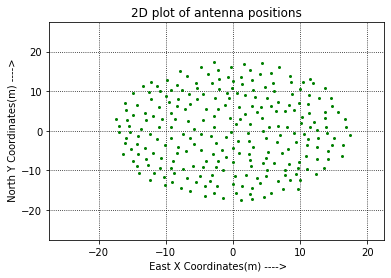

In [50]:
# Plotting a 2D plot with X and Y values 
# Ref link : # Ref link : https://www.tutorialspoint.com/how-can-i-plot-a-single-point-in-matplotlib-python

plt.xlim(min(X_list)-10, max(X_list)+5)
plt.ylim(min(Y_list)-10, max(Y_list)+10)
plt.rcParams["figure.autolayout"] = True
plt.grid(ls="dotted",color="black")
plt.xlabel(" East X Coordinates(m) ---->")
plt.ylabel(" North Y Coordinates(m) ---->")
plt.title("2D plot of antenna positions")

# Then iterate through the two lists and plot for x[i] and y[i]
for (x,y) in zip(X_list, Y_list):
    plt.plot(x, y, marker=".", markersize=4, markeredgecolor="green", markerfacecolor="green") 

In [51]:
# Defining a new dataframe to store the visibilities values
df_uvw = pd.DataFrame(columns=['Antenna_1','Antenna_2'])

# Viewing the dataframe for u,v w coordinates
df_uvw.head()

,Antenna_1,Antenna_2


In [52]:
Antenna_number_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Populating the dataframe with antenna 1 and antenna 2 values 
- row 1 : 0 0
- row 2 : 0 1
- row 3 : 0 2
- row 4 : 0 3

Total expected pairs (baselines) i.e rows : (256 x 255) / 2 = **32640**

In [53]:
min(Antenna_number_list)

0

In [54]:
max(Antenna_number_list)

255

Note: There is no need to sort the antenna_number_list, the list/.txt file are already sorted. So, will need to use them as it is, to populate the new dataframe!

In [55]:
# Ref : https://www.codegrepper.com/code-examples/python/append+row+to+dataframe
for i in Antenna_number_list: 
    for j in Antenna_number_list:
        if(i!=j):
            df_uvw = df_uvw.append({'Antenna_1':i, 'Antenna_2':j}, ignore_index=True)

# View the populated df
df_uvw

,Antenna_1,Antenna_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
65275,255,250
65276,255,251
65277,255,252
65278,255,253


In [56]:
# Function for X_lamba value for a given pair of antennas 
# Ref : https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe
# df.loc[df['B'] == 3, 'A']
def calculate_X_lambda(row):
    # Initialise the value of X_lambda to be 0
    X_lambda = 0
    
    # Get the relevant value of X Coordinate, i.e X1 for Antenna 1 
    A1 = row["Antenna_1"]
    X1 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A1, 'X_wavelength']
    value1 = float(X1)
    
    # Get the relevant value of X Coordinate, i.e X2 for Antenna 2
    A2 = row["Antenna_2"]
    X2 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A2, 'X_wavelength']
    value2 = float(X2)
    
    # Calculate the value of X_lambda
    X_lambda = float(value1 - value2)
    
    # Return the value of calculated lambda 
    return X_lambda

In [57]:
# Assigning calculated X_lambda values
df_uvw['X_lambda'] = df_uvw.apply(lambda x : calculate_X_lambda(x), axis = 1)
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda
0,0,1,3.576193
1,0,2,-0.195104
2,0,3,0.587969
3,0,4,3.615001
4,0,5,2.433215


In [58]:
# Function for Y_lamba value for a given pair of antennas 
def calculate_Y_lambda(row):
    # Initialise the value of X_lambda to be 0
    Y_lambda = 0
    
    # Get the relevant value of X Coordinate, i.e X1 for Antenna 1 
    A1 = row["Antenna_1"]
    Y1 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A1, 'Y_wavelength']
    value1 = float(Y1)
    
    # Get the relevant value of X Coordinate, i.e X2 for Antenna 2
    A2 = row["Antenna_2"]
    Y2 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A2, 'Y_wavelength']
    value2 = float(Y2)
    
    # Calculate the value of X_lambda
    Y_lambda = float(value1 - value2)
    
    # Return the value of calculated lambda 
    return Y_lambda

In [59]:
# Assigning calculated Y_lambda values
df_uvw['Y_lambda'] = df_uvw.apply(lambda x : calculate_Y_lambda(x), axis = 1)
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda,Y_lambda
0,0,1,3.576193,2.780893
1,0,2,-0.195104,1.943063
2,0,3,0.587969,2.073309
3,0,4,3.615001,0.913851
4,0,5,2.433215,-2.140825


In [60]:
# Function for Z_lamba value for a given pair of antennas 
def calculate_Z_lambda(row):
    # Initialise the value of Z_lambda to be 0
    Z_lambda = 0
    
    # Get the relevant value of X Coordinate, i.e X1 for Antenna 1 
    A1 = row["Antenna_1"]
    Z1 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A1, 'Z_wavelength']
    value1 = float(Z1)
    
    # Get the relevant value of X Coordinate, i.e X2 for Antenna 2
    A2 = row["Antenna_2"]
    Z2 = antenna_positions.loc[antenna_positions['Antenna_Number'] == A2, 'Z_wavelength']
    value2 = float(Z2)
    
    # Calculate the value of Z_lambda
    Z_lambda = float(value1 - value2)
    
    # Return the value of calculated lambda 
    return Z_lambda

In [61]:
# Assigning calculated Z_lambda values
df_uvw['Z_lambda'] = df_uvw.apply(lambda x : calculate_Z_lambda(x), axis = 1)
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda
0,0,1,3.576193,2.780893,-0.022328
1,0,2,-0.195104,1.943063,-0.013290
2,0,3,0.587969,2.073309,-0.006911
3,0,4,3.615001,0.913851,-0.008506
4,0,5,2.433215,-2.140825,0.005848


In [62]:
df_uvw.shape

(65280, 5)

### Calculating u, v and w coordinates from X_lambda, Y_lambda and Z_lambda values:

In [63]:
# Reference: 
# Pg 110 Chapter 4.1 Thompson, Moran and Swenson(TMS)
# u = sin(H)*(X_lambda) + cos(H)*(Y_lambda)
# v = -sin(delta)*cos(H)*(X_lambda) + sin(delta)*sin(H)*(Y_lambda) + cos(delta)*(Z_lambda) 
# w = cos(delta)*cos(H)*(X_lambda) - cos(delta)*sin(H)*(Y_lambda) + sin(delta)*(Z_lambda)

# For EDA2 Data, u = Xlambda, v = Ylambda and w = Zlambda
# H = 90 Degrees? 
# delta = 90 Degrees? 

In [64]:
# Assign u, v and w values 
df_uvw['u'] = df_uvw['X_lambda']
df_uvw['v'] = df_uvw['Y_lambda']
df_uvw['w'] = df_uvw['Z_lambda']
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda,u,v,w
0,0,1,3.576193,2.780893,-0.022328,3.576193,2.780893,-0.022328
1,0,2,-0.195104,1.943063,-0.013290,-0.195104,1.943063,-0.013290
2,0,3,0.587969,2.073309,-0.006911,0.587969,2.073309,-0.006911
3,0,4,3.615001,0.913851,-0.008506,3.615001,0.913851,-0.008506
4,0,5,2.433215,-2.140825,0.005848,2.433215,-2.140825,0.005848


In [65]:
# Calculating u, v and w in meters

# Calculating u_m 
df_uvw['u_m'] = df_uvw['u']*(wavelength)

# Calculating v_m
df_uvw['v_m'] = df_uvw['v']*(wavelength)

# Calculating w_m 
df_uvw['z_m'] = df_uvw['w']*(wavelength)

### Visualing these u, v and w coordinates corresponding to every pair!

In [66]:
df_uvw.shape

(65280, 11)

In [67]:
df_uvw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Antenna_1  65280 non-null  object 
 1   Antenna_2  65280 non-null  object 
 2   X_lambda   65280 non-null  float64
 3   Y_lambda   65280 non-null  float64
 4   Z_lambda   65280 non-null  float64
 5   u          65280 non-null  float64
 6   v          65280 non-null  float64
 7   w          65280 non-null  float64
 8   u_m        65280 non-null  float64
 9   v_m        65280 non-null  float64
 10  z_m        65280 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.5+ MB


In [68]:
df_uvw.describe()

,X_lambda,Y_lambda,Z_lambda,u,v,w,u_m,v_m,z_m
count,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04
mean,5.924890e-15,-7.096210e-17,3.352922e-18,5.924890e-15,-7.096210e-17,3.352922e-18,-2.423320e-15,1.798835e-14,-1.105546e-17
std,6.814688e+00,6.757373e+00,3.691752e-02,6.814688e+00,6.757373e+00,3.691752e-02,1.281877e+01,1.271096e+01,6.944372e-02
min,-1.853326e+01,-1.858217e+01,-1.089816e-01,-1.853326e+01,-1.858217e+01,-1.089816e-01,-3.486200e+01,-3.495400e+01,-2.050000e-01
25%,-4.883441e+00,-4.829748e+00,-2.658089e-02,-4.883441e+00,-4.829748e+00,-2.658089e-02,-9.186000e+00,-9.085000e+00,-5.000000e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.883441e+00,4.829748e+00,2.658089e-02,4.883441e+00,4.829748e+00,2.658089e-02,9.186000e+00,9.085000e+00,5.000000e-02
max,1.853326e+01,1.858217e+01,1.089816e-01,1.853326e+01,1.858217e+01,1.089816e-01,3.486200e+01,3.495400e+01,2.050000e-01


In [69]:
u_list = df_uvw["u"].values.tolist()
v_list = df_uvw["v"].values.tolist()
w_list = df_uvw["w"].values.tolist()

In [70]:
print(min(u_list), max(u_list))
print(min(v_list), max(v_list))
print(min(w_list), max(w_list))

-18.533258932084273 18.533258932084273
-18.582167767542707 18.582167767542707
-0.10898164422802124 0.10898164422802124


### Getting a 2D View of the U,V Coordinates 

In [71]:
# # Plotting a 2D plot with u and v values 
# # Ref link : # Ref link : https://www.tutorialspoint.com/how-can-i-plot-a-single-point-in-matplotlib-python

# plt.xlim(min(u_list)-10, max(u_list)+5)
# plt.ylim(min(v_list)-10, max(v_list)+10)
# plt.rcParams["figure.autolayout"] = True
# plt.grid(ls="dotted",color="black")
# plt.xlabel(" East u Coordinates(m) ---->")
# plt.ylabel(" North v Coordinates(m) ---->")
# plt.title("2D plot of u,v coordinates")

# # Then iterate through the two lists and plot for x[i] and y[i]
# for (u,v) in zip(u_list, v_list):
#     plt.plot(u, v, marker=".", markersize=0.25, markeredgecolor="orange", markerfacecolor="orange") 

### Getting a 3D View of the U,V,W Coordinates 

In [72]:
# # Plotting a 3D plot with U, V and W values 

# fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(111, projection='3d')
# ax.grid(ls="dotted", color="black")

# # Setting the limits 
# ax.set_xlim(min(u_list)-10,max(u_list)+5)
# ax.set_ylim(min(v_list)-10, max(v_list)+10+10)
# ax.set_zlim(min(w_list),max(w_list))


# # Iterating through the three lists and plot for x[i] and y[i]
# for (u,v,w) in zip(u_list, v_list, w_list): 
#     ax.scatter(u, v, w, marker = ".", c = "blue") # plot the point (u,v,w) on the figure

# ax.set_title("3D plot of (U,V,W):")
# ax.set_xlabel("u Coordinates ---->")
# ax.set_ylabel("v Coordinates ---->")
# ax.set_zlabel("w Coordinates ---->")
# # plt.show()

In [73]:
df_uvw

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda,u,v,w,u_m,v_m,z_m
0,0,1,3.576193,2.780893,-0.022328,3.576193,2.780893,-0.022328,6.727,5.231,-0.042
1,0,2,-0.195104,1.943063,-0.013290,-0.195104,1.943063,-0.013290,-0.367,3.655,-0.025
2,0,3,0.587969,2.073309,-0.006911,0.587969,2.073309,-0.006911,1.106,3.900,-0.013
3,0,4,3.615001,0.913851,-0.008506,3.615001,0.913851,-0.008506,6.800,1.719,-0.016
4,0,5,2.433215,-2.140825,0.005848,2.433215,-2.140825,0.005848,4.577,-4.027,0.011
...,...,...,...,...,...,...,...,...,...,...,...
65275,255,250,-1.115334,1.952632,0.007443,-1.115334,1.952632,0.007443,-2.098,3.673,0.014
65276,255,251,-0.027644,1.032402,0.002126,-0.027644,1.032402,0.002126,-0.052,1.942,0.004
65277,255,252,1.314159,-0.979772,0.011696,1.314159,-0.979772,0.011696,2.472,-1.843,0.022
65278,255,253,-0.611892,-1.671938,0.024454,-0.611892,-1.671938,0.024454,-1.151,-3.145,0.046


In [74]:
df_uvw.Antenna_1 = df_uvw.Antenna_1.astype(int)
df_uvw.Antenna_2 = df_uvw.Antenna_2.astype(int)
df_uvw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Antenna_1  65280 non-null  int32  
 1   Antenna_2  65280 non-null  int32  
 2   X_lambda   65280 non-null  float64
 3   Y_lambda   65280 non-null  float64
 4   Z_lambda   65280 non-null  float64
 5   u          65280 non-null  float64
 6   v          65280 non-null  float64
 7   w          65280 non-null  float64
 8   u_m        65280 non-null  float64
 9   v_m        65280 non-null  float64
 10  z_m        65280 non-null  float64
dtypes: float64(9), int32(2)
memory usage: 5.0 MB


In [75]:
df_vis_imag.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000000,20.347363,5.232766,17.098120,13.575706,40.088928,-4.494764,36.376900,4.382819,-5.101678,...,8.985415,0.704096,5.380109,16.447519,11.223100,13.179231,5.354980,0.0,17.303267,0.0
1,-20.347363,0.000000,-49.239357,23.557892,-10.475840,-7.355006,-58.698902,19.284822,27.034655,8.961044,...,-23.801003,-31.874340,-15.966197,-20.245653,1.901799,-21.248463,-23.853127,0.0,-34.438774,0.0
2,-5.232766,49.239357,0.000000,-158.680908,-65.660355,7.385582,-44.348717,24.389639,97.863960,54.119991,...,-25.575441,73.233078,62.957054,7.752845,-16.787003,-19.817877,-15.419326,0.0,60.391262,0.0
3,-17.098120,-23.557892,158.680908,0.000000,-37.410690,-3.263887,-64.458542,-7.080525,10.403498,25.782703,...,-18.212944,-3.222548,-53.895336,16.432007,-0.216329,29.501335,-70.752960,0.0,-9.924271,0.0
4,-13.575706,10.475840,65.660355,37.410690,0.000000,42.297253,-14.743159,37.618340,86.671875,59.724304,...,5.650125,19.793768,14.020086,37.388325,25.409815,35.181412,-10.839559,0.0,24.132935,0.0


In [76]:
# Checking for Nulls in Visibilities, imaginary 
df_vis_imag.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
251    0
252    0
253    0
254    0
255    0
Length: 256, dtype: int64

In [77]:
# Checking for Nulls in Visibilities, real
df_vis_real.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,328.867615,24.588898,21.415720,25.159893,23.272156,32.623756,67.544327,25.600283,-5.008373,56.130409,...,20.584955,23.733694,25.835600,21.793711,22.231745,17.629080,12.726423,0.0,32.011589,0.0
1,24.588898,1001.324097,32.625900,30.562368,42.107533,67.392723,49.459095,42.223946,30.334806,45.333996,...,21.941923,34.037449,69.689140,58.551960,49.599106,64.068863,42.769550,0.0,63.610893,0.0
2,21.415720,32.625900,1802.112183,-221.844772,5.765813,75.233185,28.925854,83.027077,53.337502,41.076969,...,-11.819213,103.449448,56.257942,100.279205,58.589966,71.161095,-25.184362,0.0,100.275230,0.0
3,25.159893,30.562368,-221.844772,1310.901611,119.502617,68.835815,46.054825,41.802647,53.148262,54.665218,...,96.976486,-2.359920,38.590828,38.563461,54.418682,48.846432,41.607552,0.0,20.950336,0.0
4,23.272156,42.107533,5.765813,119.502617,1286.565674,65.288414,111.641373,72.028549,-37.939823,20.661905,...,54.904049,21.105185,40.463306,48.886780,55.891804,51.915932,58.621078,0.0,31.471109,0.0


In [78]:
df_vis_real.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
251    0
252    0
253    0
254    0
255    0
Length: 256, dtype: int64

In [79]:
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda,u,v,w,u_m,v_m,z_m
0,0,1,3.576193,2.780893,-0.022328,3.576193,2.780893,-0.022328,6.727,5.231,-0.042
1,0,2,-0.195104,1.943063,-0.013290,-0.195104,1.943063,-0.013290,-0.367,3.655,-0.025
2,0,3,0.587969,2.073309,-0.006911,0.587969,2.073309,-0.006911,1.106,3.900,-0.013
3,0,4,3.615001,0.913851,-0.008506,3.615001,0.913851,-0.008506,6.800,1.719,-0.016
4,0,5,2.433215,-2.140825,0.005848,2.433215,-2.140825,0.005848,4.577,-4.027,0.011


In [80]:
df_uvw.shape

(65280, 11)

In [81]:
df_uvw.describe()

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda,u,v,w,u_m,v_m,z_m
count,65280.000000,65280.000000,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04,6.528000e+04
mean,127.500000,127.500000,5.924890e-15,-7.096210e-17,3.352922e-18,5.924890e-15,-7.096210e-17,3.352922e-18,-2.423320e-15,1.798835e-14,-1.105546e-17
std,73.900837,73.900837,6.814688e+00,6.757373e+00,3.691752e-02,6.814688e+00,6.757373e+00,3.691752e-02,1.281877e+01,1.271096e+01,6.944372e-02
min,0.000000,0.000000,-1.853326e+01,-1.858217e+01,-1.089816e-01,-1.853326e+01,-1.858217e+01,-1.089816e-01,-3.486200e+01,-3.495400e+01,-2.050000e-01
25%,63.750000,63.750000,-4.883441e+00,-4.829748e+00,-2.658089e-02,-4.883441e+00,-4.829748e+00,-2.658089e-02,-9.186000e+00,-9.085000e+00,-5.000000e-02
50%,127.500000,127.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,191.250000,191.250000,4.883441e+00,4.829748e+00,2.658089e-02,4.883441e+00,4.829748e+00,2.658089e-02,9.186000e+00,9.085000e+00,5.000000e-02
max,255.000000,255.000000,1.853326e+01,1.858217e+01,1.089816e-01,1.853326e+01,1.858217e+01,1.089816e-01,3.486200e+01,3.495400e+01,2.050000e-01


In [82]:
# Checking for NaNs
df_uvw.isna().sum()

Antenna_1    0
Antenna_2    0
X_lambda     0
Y_lambda     0
Z_lambda     0
u            0
v            0
w            0
u_m          0
v_m          0
z_m          0
dtype: int64

In [83]:
type(Antenna_number_list[0])

int

In [84]:
Antenna_number_list[0]

0

### Filling the visibilities, for the relevant antenna pairs (i.e baselines)
- Auto-correlated visibilities, have not been included. 

In [85]:
# Ref link : https://stackoverflow.com/questions/71574873/assign-one-column-value-to-another-column-based-on-condition-in-pandas
for i in range(len(Antenna_number_list)): 
    for j in range(len(Antenna_number_list)):        
        real = df_vis_real.iat[i,j]
        imag = df_vis_imag.iat[i,j]      
        
        # Set value to vis_real based on Antenna 1 and Antenna 2 values
        mask = (df_uvw['Antenna_1']==i) & (df_uvw['Antenna_2']==j)
        df_uvw.loc[mask, "vis_real"] = real
        
        # Set value to vis_imag based on Antenna 1 and Antenna 2 values 
        df_uvw.loc[mask, "vis_imag"] = imag

In [86]:
df_uvw.head()

,Antenna_1,Antenna_2,X_lambda,Y_lambda,Z_lambda,u,v,w,u_m,v_m,z_m,vis_real,vis_imag
0,0,1,3.576193,2.780893,-0.022328,3.576193,2.780893,-0.022328,6.727,5.231,-0.042,24.588898,20.347363
1,0,2,-0.195104,1.943063,-0.013290,-0.195104,1.943063,-0.013290,-0.367,3.655,-0.025,21.415720,5.232766
2,0,3,0.587969,2.073309,-0.006911,0.587969,2.073309,-0.006911,1.106,3.900,-0.013,25.159893,17.098120
3,0,4,3.615001,0.913851,-0.008506,3.615001,0.913851,-0.008506,6.800,1.719,-0.016,23.272156,13.575706
4,0,5,2.433215,-2.140825,0.005848,2.433215,-2.140825,0.005848,4.577,-4.027,0.011,32.623756,40.088928


- The conjugate visibilities, have also been accounted for. 
- Also, there are no NaN values of visibilities. 

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


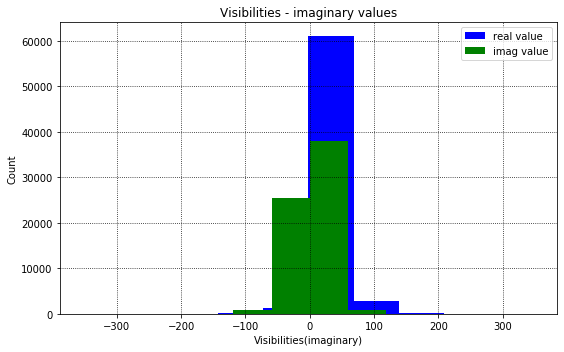

In [87]:
# Plotting an histogram of the real and imaginary values of visibilities 

# create figure
# fig = plt.figure(figsize=(15, 15))
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
# Plotting histogram for real values of visibilities 
plt.hist(df_uvw['vis_real'], color = 'blue', label="real value")
plt.title('Visibilities - real values') 
plt.xlabel('Visibilities(real)')
plt.ylabel('Count')
plt.grid(ls="dotted", color="black")
plt.legend()

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
# Plotting histogram for imaginary values of visibilities 
plt.hist(df_uvw['vis_imag'], color = 'green', label="imag value") 
plt.title('Visibilities - imaginary values') 
plt.xlabel('Visibilities(imaginary)')
plt.ylabel('Count')
plt.grid(ls="dotted", color="black")
plt.legend()

In [88]:
# Really important excel to be saved
df_uvw.to_excel(r'C:\Users\Gayatri Aniruddha\Downloads\df_uvw_EDA2_20200209.xlsx', index = False)

In [89]:
# Overall time taken in seconds                    
print("Overall time in seconds:", time.process_time() - start)

Overall time in seconds: 322.40625


### Notes: 
- The final results of the resulting dataframe have been stored in this excel.